# Assignment 3: ICP + Non-linear least squares optimization

Team: `MR21_3241`

Roll Number: `2019111041` (Prateek Sancheti), `2021701032` (Avneesh Mishra)

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import open3d as o3d
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

### Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

### Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

#### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

#### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

## Answer 1.1: Using Gradient Descent to fit Gaussian

The given gaussian function in the function `helpers.func.make_gaussian` is given by

$$ y(x;a,m,s) = \frac{a}{\sqrt{2 \pi} \, s} \; \exp \left ( \frac{-(x-m)^2}{2 \, s^2} \right ) $$

Where $a$ is a scaling constant, $m = \mu$ is the mean, $s = \sigma$ is the standard deviation of the gaussian (or normal) distribution.

In [2]:
# Import function
from helpers.func import make_gaussian

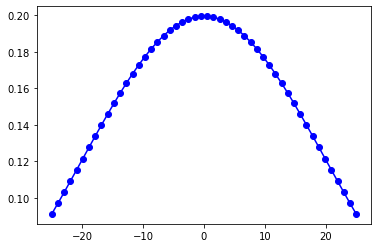

In [3]:
# Generate observations (from assumed data)
a_real, m_real, s_real = 10, 0, 20
n_obs = 50
x_obs = np.linspace(-n_obs/2, n_obs/2, n_obs)
y_obs = make_gaussian(x_obs, a_real, m_real, s_real)
# Plot data
plt.plot(x_obs, y_obs, 'bo-')

### Jacobian Values

The Jacobian matrix is given by

$$ \mathbf{J}_y = \left [ \frac{\partial y}{\partial a} \qquad \frac{\partial y}{\partial m} \qquad \frac{\partial y}{\partial s} \right ] $$

Where

$$ \frac{\partial y}{\partial a} = \frac{1}{\sqrt{2 \pi} \, s} \; \exp \left ( \frac{-(x-m)^2}{2 \, s^2} \right ) $$

$$ \frac{\partial y}{\partial m} = \frac{a(x-m)}{\sqrt{2\pi}\,s^3} \; \exp \left ( \frac{-(x-m)^2}{2s^2} \right ) $$

$$ \frac{\partial y}{\partial s} = \left [ \frac{(x-m)^2}{s^3} - \frac{1}{s} \right ] \frac{a}{\sqrt{2\pi} \, s} \; \exp \left ( \frac{-(x-m)^2}{2s^2} \right ) $$

The shape of this matrix will be $(N_{obs}, 3)$.

These are programmed in the cell below


In [4]:
# Jacobians

# For a
def jac_ya(x, a, m, s):
    pd_y_a = (1/(np.sqrt(2*np.pi)*s)) * np.exp((-(x-m)**2)/(2*s**2))
    return pd_y_a

# For m
def jac_ym(x, a, m, s):
    pd_y_m = ((a*(x-m))/(np.sqrt(2*np.pi)*(s**3))) * \
        np.exp((-(x-m)**2)/(2*s**2))
    return pd_y_m

# For s
def jac_ys(x, a, m, s):
    pd_y_s = (((x-m)**2/(s**3))-(1/s)) * (a/(np.sqrt(2*np.pi)*s)) * \
        np.exp((-(x-m)**2)/(2*s**2))
    return pd_y_s

### Adjusting parameters through Gradient Descent

We declare initial parameters and hyperparameters like learning rate, tolerance, number of iterations, etc. Then, in a loop, we calculate residuals, then get gradients, and then update the parameters. This loop goes on till the cost tolerance is met or the actual parameters are found.

The residuals, shape is $(N_{obs}, 1)$, is calculated as follows

$$ r(a_i, m_i, s_i) = y(x_{obs}; a_i, m_i, s_i) - y_{obs} $$

The new parameters $\mathbf{k}_{i+1} = [a_{i+1}, m_{i+1}, s_{i+1}]$, are calculated as follows

$$ \mathbf{k}_{i+1} = \mathbf{k}_i - \alpha \mathbf{J}_y^T r(\mathbf{k}_i) $$

We run this till

- Either the number of iterations are reached
- Or, a given tolerance is reached ($\alpha \mathbf{J}_y^T r(\mathbf{k}_i)$ updates become very small). This could also be applied to the magnitude of residuals.


In [5]:
# Initial parameters
a0, m0, s0 = 1.2, 10, 3
# Hyperparameters
lr = 10  # Learning rate
num_iter = 300  # Number of iterations
tol = 1e-6  # Tolerance for updates

In [6]:
# Training loop
ai, mi, si = a0, m0, s0     # Initial parameters
cost_history = []
for _ in range(num_iter):
    # Calculate residuals
    r_i = (make_gaussian(x_obs, ai, mi, si) - y_obs)
    cost = np.linalg.norm(r_i)**2
    if cost < tol:
        break
    cost_history.append(cost)
    # Calculate Jacobians
    jac_T = np.vstack((jac_ya(x_obs, ai, mi, si), 
        jac_ym(x_obs, ai, mi, si), jac_ys(x_obs, ai, mi, si)))
    # Change in a, m, s
    del_k = -lr*(jac_T @ r_i)
    ai += del_k[0]
    mi += del_k[1]
    si += del_k[2]
cost_history = np.array(cost_history)

In [7]:
print(f"Real (a, m, s): {a_real}, {m_real}, {s_real}")
print(f"Initial (a, m, s): {a0}, {m0}, {s0}")
print(f"Trained (a, m, s): {ai}, {mi}, {si}")

Real (a, m, s): 10, 0, 20
Initial (a, m, s): 1.2, 10, 3
Trained (a, m, s): 9.68268531586539, 0.08753722822953948, 19.064984738426737


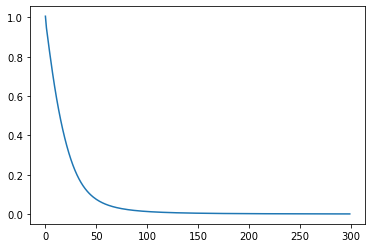

In [8]:
plt.plot(cost_history)

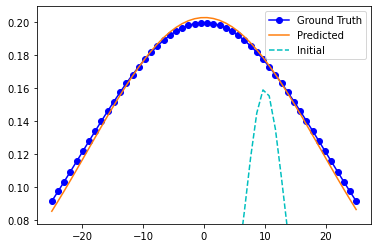

In [9]:
plt.plot(x_obs, y_obs, 'bo-', label="Ground Truth")
y_trained = make_gaussian(x_obs, ai, mi, si)
plt.plot(x_obs, y_trained, 'tab:orange', label="Predicted")
y_init = make_gaussian(x_obs, a0, m0, s0)
plt.plot(x_obs, y_init, 'c--', label="Initial")
plt.ylim(np.min(y_obs) * 0.85, np.max(y_obs)*1.05)
plt.legend()

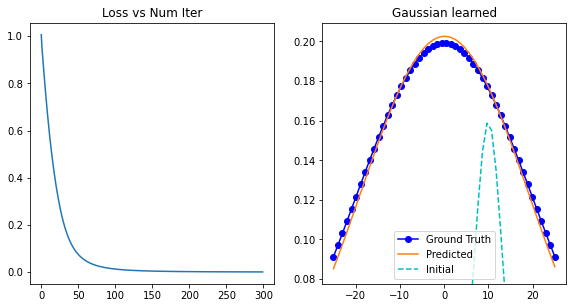

In [10]:
# The graph like asked in the question
fig = plt.figure(0, (9.6, 4.8))
plt.subplot(121)
plt.title("Loss vs Num Iter")
plt.plot(cost_history)
# Training
plt.subplot(122)
plt.title("Gaussian learned")
plt.plot(x_obs, y_obs, 'bo-', label="Ground Truth")
y_trained = make_gaussian(x_obs, ai, mi, si)
plt.plot(x_obs, y_trained, 'tab:orange',
    label="Predicted")
y_init = make_gaussian(x_obs, a0, m0, s0)
plt.plot(x_obs, y_init, 'c--',
    label="Initial")
plt.ylim(np.min(y_obs) * 0.85, np.max(y_obs)*1.05)
plt.legend()

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:

<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>

Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.


## Answer 1.2: Gradient Descent on a Non-Linear function

The given function in `helpers.func.make_non_linear` is given by

$$ y(x; p_1, p_2, p_3, p_4) = p_1 \,  \exp \left ( \frac{-x}{p_2} \right ) + p_3 \, \sin \left ( \frac{x}{p_4} \right ) $$

Where $p_1$, $p_2$, $p_3$, and $p_4$ are parameters of the function.

In [11]:
# Import function
from helpers.func import make_non_linear

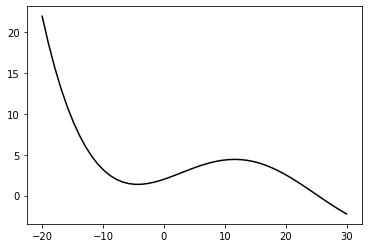

In [12]:
# General data
p1_r, p2_r, p3_r, p4_r = 2, 8, 4, 8
n_obs = 50
x_obs = np.linspace(-20, 30, n_obs)
mk_non_linear = np.vectorize(make_non_linear)
y_obs = mk_non_linear(x_obs, p1_r, p2_r, p3_r, p4_r)
# Plot data
plt.plot(x_obs, y_obs, 'k-')

### Jacobian Values

The Jacobian of this is given by

$$ \mathbf{J}_y = \left [ \frac{\partial y}{\partial p_1} \quad \frac{\partial y}{\partial p_2} \quad \frac{\partial y}{\partial p_3} \quad \frac{\partial y}{\partial p_4} \right ] $$

Where

$$ \frac{\partial y}{\partial p_1} = \exp \left ( \frac{-x}{p_2} \right ) $$

$$ \frac{\partial y}{\partial p_2} = \frac{x \, p_1}{p_2^2} \, \exp \left ( \frac{-x}{p_2} \right ) $$

$$ \frac{\partial y}{\partial p_3} = \sin \left ( \frac{x}{p_4} \right ) $$

$$ \frac{\partial y}{\partial p_4} = \frac{-x\,p_3}{p_4} \, \cos \left ( \frac{x}{p_4} \right ) $$

The shape of this jacobian matrix will be $(N_{obs}, 4)$. These are programmed in the cell below.

In [13]:
# Jacobians

# For p1
def jac_yp1(x, p1, p2, p3, p4):
    pd_y_p1 = np.exp(-x/p2)
    return pd_y_p1

# For p2
def jac_yp2(x, p1, p2, p3, p4):
    pd_y_p2 = (x*p1/p2**2) * np.exp(-x/p2)
    return pd_y_p2

# For p3
def jac_yp3(x, p1, p2, p3, p4):
    pd_y_p3 = np.sin(x/p4)
    return pd_y_p3

# For p4
def jac_yp4(x, p1, p2, p3, p4):
    pd_y_p4 = -(x*p3/p4**2) * np.cos(x/p4)
    return pd_y_p4


### Adjusting parameters through Gradient Descent

1. Calculate residuals

    $$ r(p_1, p_2, p_3, p_4) = y(x_{obs}; p_1, p_2, p_3, p_4) - y_{obs} $$

2. Calculate change in parameters

    $$ \mathbf{k}_i = \left [ p_1^{(i)} \quad p_2^{(i)} \quad p_3^{(i)} \quad p_4^{(i)} \right ] $$
    $$ \Delta \mathbf{k} = -\alpha \mathbf{J}_y^T r(\mathbf{k}_i) $$
    $$ \mathbf{k}_{i+1} = \mathbf{k}_i + \Delta \mathbf{k} $$

Run the above two steps till convergence, finite iterations or till the residuals become small enough

In [14]:
# Initial parameters
p1, p2, p3, p4 = 0, 9, 3, 6
# Hyperparaemters
lr = 1e-3    # Learning rate
num_iter = 300  # Number of iterations
tol = 1e-6  # Tolerance for updates

In [15]:
# Training loop
p1_i, p2_i, p3_i, p4_i = p1, p2, p3, p4
cost_history = []
for _ in range(num_iter):
    # Calculate residuals
    r_i = (mk_non_linear(x_obs, p1_i, p2_i, p3_i, p4_i) - y_obs)
    # Cost value
    cost = np.linalg.norm(r_i) ** 2
    cost_history.append(cost)
    # Calculate Jacobians
    jac_T = np.vstack((
        jac_yp1(x_obs, p1_i, p2_i, p3_i, p4_i),
        jac_yp2(x_obs, p1_i, p2_i, p3_i, p4_i),
        jac_yp3(x_obs, p1_i, p2_i, p3_i, p4_i),
        jac_yp4(x_obs, p1_i, p2_i, p3_i, p4_i)))
    # Change in parameters
    del_k = -lr * (jac_T @ r_i)
    p1_i += del_k[0]
    p2_i += del_k[1]
    p3_i += del_k[2]
    p4_i += del_k[3]
cost_history = np.array(cost_history)   # Cost as numpy array

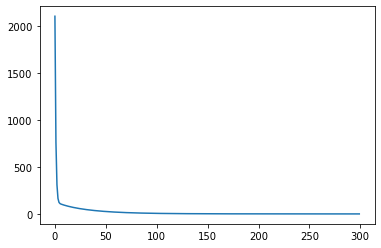

In [16]:
plt.plot(cost_history)

In [17]:
print(f"Real (p1, p2, p3, p4): {p1_r}, {p2_r}, {p3_r}, {p4_r}")
print(f"Initial (p1, p2, p3, p4): {p1}, {p2}, {p3}, {p4}")
print(f"Trained (p1, p2, p3, p4): {p1_i}, {p2_i}, {p3_i}, {p4_i}")


Real (p1, p2, p3, p4): 2, 8, 4, 8
Initial (p1, p2, p3, p4): 0, 9, 3, 6
Trained (p1, p2, p3, p4): 2.054974664474737, 8.10828752156546, 3.999549714573081, 7.975377701912879


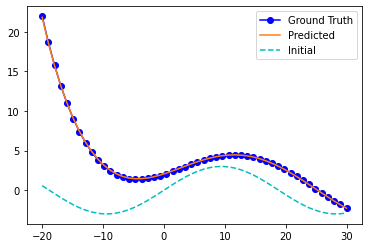

In [18]:
plt.plot(x_obs, y_obs, 'bo-', label="Ground Truth")
y_trained = mk_non_linear(x_obs, p1_i, p2_i, p3_i, p4_i)
plt.plot(x_obs, y_trained, 'tab:orange', label="Predicted")
y_init = mk_non_linear(x_obs, p1, p2, p3, p4)
plt.plot(x_obs, y_init, 'c--', label="Initial")
plt.legend()

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**

   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

## Answer 1.3: Using other optimizers

- First, `1.1` is attempted using Gauss-Newton and Levenberg Method
- Then, the given questions are attempted

**References**

- Ethan Eade [notes](https://ethaneade.com/optimization.pdf) on Gauss Newton and LM Optimization


### Gauss Newton Method

The goal is to minimize the squared distance error $\mathbf{L}$

$$ \mathbf{L} = \frac{1}{2} \, \mathbf{f} (\mathbf{x})^\top  \mathbf{f} (\mathbf{x}) $$

Where $\mathbf{f}$ is the distance function and $\mathbf{x}$ is the vector of parameters that has to be tuned. Usually, this function is non-linear and is approximated to a linear function using [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) as follows

$$ \mathbf{f} ( \mathbf{x} + \delta \mathbf{x} ) = \mathbf{f} (\mathbf{x}) + \mathbf{J} \delta \mathbf{x} $$

Where $\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{x}}$ is the jacobian of $\mathbf{f}$ (first derivative). The above equation holds good for small perturbation $\delta \mathbf{x}$. The new loss becomes

$$ \mathbf{L}(\delta \mathbf{x}) = \frac{1}{2} \, \mathbf{f} (\mathbf{x} + \delta \mathbf{x})^\top  \mathbf{f} (\mathbf{x} + \delta \mathbf{x}) = \frac{1}{2} \left [ \mathbf{f} (\mathbf{x}) + \mathbf{J} \delta \mathbf{x} \right ]^\top \left [ \mathbf{f} (\mathbf{x}) + \mathbf{J} \delta \mathbf{x} \right ] $$

Which expands to

$$ \mathbf{L}(\delta \mathbf{x}) = \frac{1}{2} \left [ \mathbf{f}(\mathbf{x})^\top \mathbf{f}(\mathbf{x}) + \mathbf{f}(\mathbf{x})^\top \mathbf{J} \delta \mathbf{x} + \delta \mathbf{x}^\top \mathbf{J}^\top \mathbf{f}(\mathbf{x}) + \delta \mathbf{x}^\top \mathbf{J}^\top \mathbf{J} \delta \mathbf{x} \right ] $$

To decide the best $\delta \mathbf{x}$ in minimizing $\mathbf{L}$, we solve for $\frac{\partial \mathbf{L}(\delta \mathbf{x}) }{\partial (\delta \mathbf{x})} = 0$, which gives (using simple [identities](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-vector_identities) of matrix calculus in denominator layout convention)

$$ 0 = \frac{1}{2} \left [ 0 + \left( \mathbf{f}(\mathbf{x})^\top \mathbf{J} \right )^\top + \left( \mathbf{f}(\mathbf{x})^\top \mathbf{J} \right )^\top + \left ( \mathbf{J}^\top \mathbf{J} +  \left ( \mathbf{J}^\top \mathbf{J} \right )^\top \right ) \delta \mathbf{x} \right ] = \mathbf{J}^\top \mathbf{f}(\mathbf{x}) + \mathbf{J}^\top \mathbf{J} \, \delta \mathbf{x} $$

This means

$$ \mathbf{J}^\top \mathbf{J} \, \delta \mathbf{x} = -\mathbf{J}^\top \mathbf{f}(\mathbf{x}) \Rightarrow \delta \mathbf{x} = -\left ( \mathbf{J}^\top \mathbf{J} \right )^{-1} \mathbf{J}^\top \mathbf{f}(\mathbf{x}) $$

Note that $\mathbf{f}$ can be $\mathbf{y}(s; \mathbf{x}) - y_{d}$, in that case $\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{x}} = \frac{\partial \mathbf{y}}{\partial \mathbf{x}}$

In [19]:
# Construct data
a_real, m_real, s_real = 10, 0, 15
n_obs = 50
x_obs = np.linspace(-n_obs/2, n_obs/2, n_obs)
y_obs = make_gaussian(x_obs, a_real, m_real, s_real)
# Initial parameters
a0, m0, s0 = 1.2, 10, 1
num_iter = 20

In [20]:
# Initial parameters
ai, mi, si = a0, m0, s0
cost_history = []
for _ in range(num_iter):
    # Calculate error function f
    r_i = (make_gaussian(x_obs, ai, mi, si) - y_obs)
    cost = np.linalg.norm(r_i) ** 2
    cost_history.append(cost)
    # Calculate jacobians
    jac_T = np.vstack((
        jac_ya(x_obs, ai, mi, si),
        jac_ym(x_obs, ai, mi, si),
        jac_ys(x_obs, ai, mi, si)
    ))
    jac = jac_T.T
    jjt_inv = np.linalg.inv(jac_T @ jac)
    del_x = -jjt_inv @ jac_T @ r_i
    ai += del_x[0]
    mi += del_x[1]
    si += del_x[2]
cost_history = np.array(cost_history)

Real (a, m, s): 10, 0, 15
Initial (a, m, s): 1.2, 10, 1
Trained (a, m, s): 10.0, -2.6017249303244575e-18, 15.0


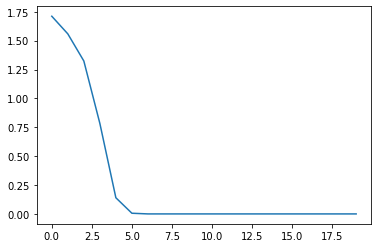

In [21]:
print(f"Real (a, m, s): {a_real}, {m_real}, {s_real}")
print(f"Initial (a, m, s): {a0}, {m0}, {s0}")
print(f"Trained (a, m, s): {ai}, {mi}, {si}")
plt.plot(cost_history)

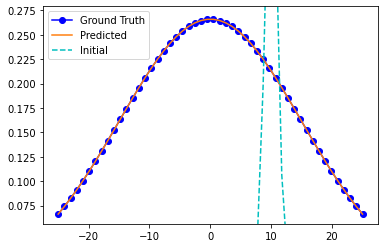

In [22]:
plt.plot(x_obs, y_obs, 'bo-', label="Ground Truth")
y_trained = make_gaussian(x_obs, ai, mi, si)
plt.plot(x_obs, y_trained, 'tab:orange', label="Predicted")
y_init = make_gaussian(x_obs, a0, m0, s0)
plt.plot(x_obs, y_init, 'c--', label="Initial")
plt.ylim(np.min(y_obs) * 0.85, np.max(y_obs)*1.05)
plt.legend()

### Levenberg Method

This is a tradeoff between gradient descent and Gauss Newton. The change is given by

$$ \delta \mathbf{x} = -\left ( \mathbf{J}^\top \mathbf{J} + \lambda \, \mathbf{I} \right )^{-1} \mathbf{J}^\top \mathbf{f}(\mathbf{x}) $$

Where $\lambda$ is a constant which can start with some value (usually 1), and adjusted during optimization. Usually $1 < a < b$, where $a$ and $b$ are hyper-parameters, the following is done

- If the value of residual decreases, then $\lambda \leftarrow \frac{1}{a} \cdot \lambda$
- If the value of residual doesn't decrease, we need to increase the weight of gradient descent, we do $\lambda \leftarrow b \cdot \lambda$ and do not update the parameters

We can also set $\lambda$ to a constant.


In [23]:
# Construct data
a_real, m_real, s_real = 10, 0, 15
n_obs = 50
x_obs = np.linspace(-n_obs/2, n_obs/2, n_obs)
y_obs = make_gaussian(x_obs, a_real, m_real, s_real)
a0, m0, s0 = 1.2, 10, 3 # Initial parameter values
# Hyperparameters
num_iter = 100
ld = 0.1  # Lambda value

In [24]:
# Training loop
ai, mi, si = a0, m0, s0     # Initial parameters
cost_history = []
cost_p = None
for _ in range(num_iter):
    # Calculate error function f
    r_i = (make_gaussian(x_obs, ai, mi, si) - y_obs)
    cost = np.linalg.norm(r_i) ** 2
    cost_history.append(cost)
    # Calculate Jacobian
    jac_T = np.vstack((
        jac_ya(x_obs, ai, mi, si),
        jac_ym(x_obs, ai, mi, si),
        jac_ys(x_obs, ai, mi, si)
    ))
    jac = jac_T.T
    jjtl_inv = np.linalg.inv(jac_T @ jac + ld * np.eye(3))
    del_x = -jjtl_inv @ jac_T @ r_i
    ai += del_x[0]
    mi += del_x[1]
    si += del_x[2]
cost_history = np.array(cost_history)

Real (a, m, s): 10, 0, 15
Initial (a, m, s): 1.2, 10, 3
Trained (a, m, s): 9.804552967417381, 0.2146866978112089, 14.54579571963236


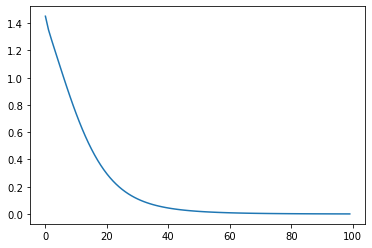

In [25]:
print(f"Real (a, m, s): {a_real}, {m_real}, {s_real}")
print(f"Initial (a, m, s): {a0}, {m0}, {s0}")
print(f"Trained (a, m, s): {ai}, {mi}, {si}")
plt.plot(cost_history)

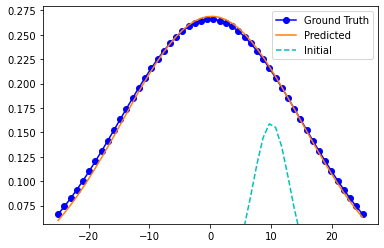

In [26]:
plt.plot(x_obs, y_obs, 'bo-', label="Ground Truth")
y_trained = make_gaussian(x_obs, ai, mi, si)
plt.plot(x_obs, y_trained, 'tab:orange', label="Predicted")
y_init = make_gaussian(x_obs, a0, m0, s0)
plt.plot(x_obs, y_init, 'c--', label="Initial")
plt.ylim(np.min(y_obs) * 0.85, np.max(y_obs)*1.05)
plt.legend()

### Answer 1.3.1: Choice of hyperparameters

- **Initial Estimate**: The closer to actual, the better. But since the actual parameters are not known (and have to be inferred from optimization), it is chosen at random. If parameters that are very far from the actual values are chosen, they may not converge to actual parameters. Since the function is non-linear (there's a jacobian linearization involved), the loss function may not have only one optima, itt could have local minima. Here, initial estimate matters, as methods that purely rely on gradient may get stuck in a local minima.
- **Learning Rate**: Greater the learning rate, the faster the convergence. A low learning rate has slower convergence. However, the learning rate cannot be very high also, because then it overshoots and then starts increasing the loss function instead (it will even settle, if it eventually ever does, at a very high cost). It is best to set a small learning rate, see for first few iterations that the cost value is decreasing, then start either increasing learning rate, or the number of iterations.


### Answer 1.3.2: Comparison of above algorithms

- While gradient descent operates on gradient (step size is a small fraction of the cost gradient), methods derived from Gauss-Newton actually choose a variable step size that is most effective. This makes Gauss-Newton faster when converging.
- It is observable that methods like Gauss-Newton and Levenberg converge faster. However, there could be cases where the $\mathbf{J}^\top \mathbf{J}$ could become non-invertible. In such cases, algorithms like Levenberg help (the $\lambda$ ensures that it is always invertible). The Gauss-Newton methods may not be very numerically stable, but converge fast when they work. Levenberg is a good middle ground.
- Usually, Levenberg algorithm can also handle optimization over fields where there is [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) used (over the euclidean distance, as done here).

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.



## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


## Answer 2.1: Procrustes Alignment

Procrustes Alignment is the procedure to find an optimal matrix that closely maps one matrix to another (alignment problem)

### Answer 2.1 - Part 1: Procrustes Alignment function


In [27]:
# Procrustes alignment function
def run_procrustes_alignment(pcA, pcB):
    """
    Runs Procrustes Alignment that gets 'R' and 't', such that we can
    get A when these are applied to B. Basically
    $$ A - (R * B + t) = 0 $$
    The function returns the transform to apply to points in B so that
    they align with points in A.

    Parameters:
    - pcA: np.ndarray   shape: (3, N)
        The point clouds A. This is the home frame (reference usually)
    - pcB: np.ndarray   shape: (3, N)
        The point clouds B, whose relation has to be found
    - num_iter: int     default: 1
        The number of iterations to run the alignment
    
    Returns:
    - R: np.ndarray     shape: (3, 3)
        The rotation matrix (SO(3), direction cosines)
    - t: np.ndarray     shape: (3, 1)
        The translation vector
    """
    A :np.ndarray = pcA
    B :np.ndarray = pcB
    A_bar = np.mean(A, axis=1, keepdims=True)   # 3,1 mean of A
    B_bar = np.mean(B, axis=1, keepdims=True)   # 3,1 mean of B
    X = A - A_bar
    Y = B - B_bar
    # SVD (for R)
    U, S, V_t = np.linalg.svd(Y @ X.T)
    V, U_t = V_t.T, U.T
    so3g_mat = np.eye(3)    # Guarantee SO(3)
    so3g_mat[2, 2] = np.sign(np.linalg.det(V @ U_t))
    # Results
    R = V @ so3g_mat @ U_t
    t = A_bar - R @ B_bar
    return R, t


Test with random data. The rotation matrix below was obtained by Axis-angle as `0 1 1`. Matrix exponential can be calculated [here](https://ethaneade.com/so3.html). The translation is also chosen to be random.

In [28]:
# Test the above function with random data
rng = np.random.default_rng(seed=10)
B = rng.uniform(-5, 5, (10, 3)).T
R_real = np.array([     # Try any rotation matrix
    [0.1559436947653744, -0.6984559986366083, 0.6984559986366083],
    [0.6984559986366083, 0.5779718473826871, 0.4220281526173128],
    [-0.6984559986366083, 0.4220281526173128, 0.5779718473826871]
])
t_real = np.array(rng.uniform(-2, 2, 3)).reshape(3, 1)
A = R_real @ B + t_real
# Test the Procrustes Alignment function
R_p, t_p = run_procrustes_alignment(A, B)
if np.allclose(R_real, R_p) and np.allclose(t_real, t_p):
    print("Looks like the method works")

Looks like the method works


### Answer 2.1 - Part 2: Bunny Point Cloud

The bunny point cloud is located in `resources` folder


In [29]:
# Read the file
file_name = "./resources/bunny.ply"
N = 2500
bunny_mesh = o3d.io.read_triangle_mesh(file_name)
# Convert to point cloud
bunny_pc = bunny_mesh.sample_points_uniformly(N)
cf_pc = o3d.geometry.TriangleMesh.create_coordinate_frame(0.2)
# Color them (separately)
bunny_A = copy.deepcopy(bunny_pc)
c = [252, 57, 3] # RGB 255 color
bunny_A.paint_uniform_color([c[0]/255, c[1]/255, c[2]/255])
bunny_B = copy.deepcopy(bunny_pc)
c = [97, 255, 5] # RGB 255 color
bunny_B.paint_uniform_color([c[0]/255, c[1]/255, c[2]/255])
# Coordinate frames
cf_A = o3d.geometry.TriangleMesh.create_coordinate_frame(0.2)
cf_B = o3d.geometry.TriangleMesh.create_coordinate_frame(0.2)

In [30]:
# Define a rotation and translation
R_real = np.array([     # Try any rotation matrix
    [0.1559436947653744, -0.6984559986366083, 0.6984559986366083],
    [0.6984559986366083, 0.5779718473826871, 0.4220281526173128],
    [-0.6984559986366083, 0.4220281526173128, 0.5779718473826871]
])
t_real = np.array(rng.uniform(-0.5, 0.5, 3)).reshape(3, 1)

In [31]:
# Apply transformations
bunny_A.rotate(R_real, center=[0, 0, 0])
bunny_A.translate(t_real)
cf_A.rotate(R_real, center=[0, 0, 0])
cf_A.translate(t_real)

TriangleMesh with 1134 points and 2240 triangles.

In [32]:
# Visualize them before the transformation
o3d.visualization.draw_geometries([cf_A, bunny_A, cf_B, bunny_B],
    "Bunnies", width=1080, height=720)

This gives a figure like (note that the translation is random)

![Bunnies](./results/q2/2-1-bunnies-init.png)


In [33]:
# Estimate rotation and translation through Procrustes alignment
pcA = np.array(bunny_A.points).T
pcB = np.array(bunny_B.points).T
R_p, t_p = run_procrustes_alignment(pcA, pcB)
# Proof that the inverse transform matches
R_inv = R_p.T
t_inv = - R_inv @ t_p
if np.allclose(R_real, R_p) and np.allclose(t_real, t_p) and \
    np.allclose(R_inv @ pcA + t_inv, pcB):
    print("Looks like the method works (even with inverse)")

Looks like the method works (even with inverse)


### Answer 2.1 - Part 3: Modular function

The function `run_procrustes_alignment` implemented above can be used in the next section


### Answer 2.1 - Part 4: Derivation and Proof of best alignment

We first look at derivation and then follow with the proof (by intuition).

**Derivation of Procrustes Alignment**

Say we have two sets of $N$ points represented as $(3, N)$ matrices that we call $\mathbf{A}$ and $\mathbf{B}$ (each is a $(3, N)$ matrix). We would like to know the transformation relating $\mathbf{B}$ to $\mathbf{A}$ (transformation that needs to be applied to $\mathbf{B}$ to get $\mathbf{A}$).

We pose this as an optimization problem (taking square just to cancel the square root)

$$ \left \{ \mathbf{R}, \mathbf{t} \right \} = \underset{\mathbf{R}, \mathbf{t}}{\textup{argmin}} \sum_{i=1}^N \left \| \mathbf{a}_i - \left ( \mathbf{R} \mathbf{b}_i + \mathbf{t} \right ) \right \|^2 $$

Where $\mathbf{a}_i$ and $\mathbf{b}_i$ are the ith column of (or point in) $\mathbf{A}$ and $\mathbf{B}$ respectively. We basically need to minimize the function

$$ L (\mathbf{R}, \mathbf{t}) = \sum_{i=1}^N \left \| \mathbf{a}_i - \mathbf{R} \mathbf{b}_i - \mathbf{t} \right \|^2 $$

Assuming that we know $\mathbf{R}$ (fix it for one iteration), we can find $\mathbf{t}$ as follows (value of $\mathbf{t}$ that minimizes $L$). Consider that $\mathbf{c}_i = \mathbf{a}_i - \mathbf{R} \mathbf{b}_i$

1. Simplify $L$

    $$ L (\mathbf{t}) = \sum_{i=1}^N \left ( \mathbf{a}_i - \mathbf{R} \mathbf{b}_i - \mathbf{t} \right )^\top \left ( \mathbf{a}_i - \mathbf{R} \mathbf{b}_i - \mathbf{t} \right ) = \sum_{i=1}^N \left ( \mathbf{c}_i - \mathbf{t} \right )^\top \left (\mathbf{c}_i - \mathbf{t} \right ) = \sum_{i=1}^N \left ( \mathbf{c}_i^\top \mathbf{c}_i - \mathbf{c}_i^\top \mathbf{t} -\mathbf{t}^\top \mathbf{c}_i + \mathbf{t}^\top \mathbf{t} \right ) $$

2. Equate derivative to 0 (local minima)

    $$ \frac{\partial L(\mathbf{t})}{\partial \mathbf{t}} = \sum_{i=1}^N \left ( -2 \mathbf{c}_i + 2 \mathbf{t} \right ) = 0 \Rightarrow N \, \mathbf{t} = \sum_{i=1}^N \mathbf{c}_i = \sum_{i=1}^N \mathbf{a}_i - \mathbf{R} \mathbf{b}_i $$

    By rearranging terms, we get

    $$ \mathbf{t} = \left ( \frac{1}{N} \sum_{i=1}^N \mathbf{a}_i \right ) - \mathbf{R} \left ( \frac{1}{N} \sum_{i=1}^N \mathbf{b}_i \right ) = \bar{\mathbf{A}} - \mathbf{R} \, \bar{\mathbf{B}} $$

    We basically assume the translation vector to be the displacement vector between the centroids of the point clouds.

With this new $\mathbf{t}$, let us find $\mathbf{R}$

1. Define some new terms (new point values after the centroid offset)

    $$ L (\mathbf{R}, \mathbf{t}) = \sum_{i=1}^N \left \| \mathbf{a}_i - \mathbf{R} \mathbf{b}_i - \bar{\mathbf{A}} + \mathbf{R} \, \bar{\mathbf{B}} \right \|^2 = \sum_{i=1}^N \left \| \left (  \mathbf{a}_i - \bar{\mathbf{A}} \right ) - \mathbf{R} \, \left ( \mathbf{b}_i - \bar{\mathbf{B}} \right ) \right \|^2 $$

    Let $\mathbf{x}_i = \mathbf{a}_i - \bar{\mathbf{A}}$ be the ith column (point) of $\mathbf{X}$, similarly, let $\mathbf{y}_i = \mathbf{b}_i - \bar{\mathbf{B}}$ be the ith column (point) of $\mathbf{Y}$

    $$ L (\mathbf{R}) = \sum_{i=1}^N \left \| \mathbf{x}_i - \mathbf{R} \mathbf{y}_i \right \|^2 $$

2. Describe $L$ in terms of [Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra))

    $$ L (\mathbf{R}) = \textup{Tr} \left ( \left ( \mathbf{X} - \mathbf{R\,Y} \right )^\top \left ( \mathbf{X} - \mathbf{R\,Y} \right ) \right ) = \textup{Tr} \left ( \mathbf{X}^\top \mathbf{X} \right ) - \textup{Tr} \left ( \mathbf{X}^\top \mathbf{R\,Y} \right ) - \textup{Tr} \left ( \mathbf{Y^\top \, R^\top} \mathbf{X} \right ) + \textup{Tr} \left ( \mathbf{Y^\top R^\top R Y} \right ) $$

    Which gives

    $$ L (\mathbf{R}) = \textup{Tr} \left ( \mathbf{X}^\top \mathbf{X} \right ) + \textup{Tr} \left ( \mathbf{Y^\top Y} \right ) - 2 \; \textup{Tr} \left ( \mathbf{X}^\top \mathbf{R\,Y} \right ) = \textup{Tr} \left ( \mathbf{X}^\top \mathbf{X} \right ) + \textup{Tr} \left ( \mathbf{Y^\top Y} \right ) - 2 L_1(\mathbf{R}) $$

    where $L_1(\mathbf{R}) = \textup{Tr} \left ( \mathbf{X}^\top \mathbf{R\,Y} \right )$. Turns out minimizing L is same as **maximizing** $L_1$.

3. Rearrange $L_1$ using rules of the trace operator and SVD

    $$ L_1(\mathbf{R}) = \textup{Tr} \left ( \mathbf{X}^\top \mathbf{R\,Y} \right ) = \textup{Tr} \left ( \mathbf{YX^\top R} \right ) $$

    Using [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition), we can express $\mathbf{YX^\top} = \mathbf{USV^\top}$. Where $\mathbf{U}$ and $\mathbf{V}$ are orthonormal matrices and $\mathbf{S}$ is a diagonal matrix consisting of singular values (usually in descending order).

    $$ L_1(\mathbf{R}) = \textup{Tr} \left ( \mathbf{YX^\top R} \right ) = \textup{Tr} \left ( \mathbf{USV^\top R} \right ) = \textup{Tr} \left ( \mathbf{V^\top R US} \right ) $$

    Note that $\mathbf{Z} = \mathbf{V^\top R U}$ is a $(3, 3)$ matrix, and $\mathbf{S}$ is a diagonal matrix. So the trace will simply give the sum of the product of corresponding diagonal elements. Note that $\mathbf{Z}$ is made of orthonormal vectors (so the trace will have an upper limit)

    $$ L_1(\mathbf{R}) = \textup{Tr} \left ( \mathbf{V^\top R US} \right ) = \textup{Tr} \left ( \mathbf{ZS} \right ) = \sum_{i=1}^3 z_{ii} \sigma_i \leq \sum_{i=1}^3 \sigma_i $$

    The best case scenario is if $\mathbf{Z} = \mathbf{I}$

    $$ Z = \mathbf{I} \Rightarrow \mathbf{V^\top R U} = \mathbf{I} \Rightarrow \mathbf{R} = \mathbf{VU^\top} $$

4. Ensure that $\mathbf{R}$ belongs to the special orthonormal group, that is $\det (\mathbf{R}) = 1$

    The above still has provisions for $\det (\mathbf{R})$ to be $-1$. We can simply flip the last column if this is the case. We can do that using

    $$ 
        \mathbf{R} = \mathbf{V} \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & \textup{sign} \left( \det \left( \mathbf{VU^\top} \right ) \right )
        \end{bmatrix}
        \mathbf{U^\top} 
    $$

Now that we have the best $\mathbf{R}$ for the given $\mathbf{t}$, we can improve $\mathbf{t}$ once more and continue with more such iterations.

**Proof of best alignment** through intuition

1. It is clear through the derivation that, if the rotation matrix is proper, then the procedure for Procrustes alignment chooses the most optimal translation to minimize the error between the two points. That is how the derivation for $\mathbf{t}$ is done above.
2. Intuitively, the value of translation vector is simply the displacement vector between the centroids. This is the most optimal because there can be only one such relation when correspondences are definitely known.
3. Note that if the correspondences are definitely known, this method does not require any other information. That is, it is independent of intermediate states (between observations), only the final and initial states matter (when the observations were made).
4. Note that in the derivation, the $\mathbf{YX^\top}$ is simply the covariance matrix. The SVD gives the orthonormal basis of the space. The relation between the two point clouds $\mathbf{A}$ and $\mathbf{B}$ is embedded in this, which is retrieved using the equation for $\mathbf{R}$. It can also be noted that the singular values are always positive, hance, the maximization of $L_1$ in the derivation above entails the fact that $\mathbf{Z} = I$ is the only solution that maximizes $L_1$.
5. The optimal $\mathbf{R}$ is therefore obtained through Procrustes alignment. Once the optimal rotation is known, the $\mathbf{t}$ has to be correct (rotation is calculated and applied to the points before the centroid is shifted).


## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?